# Basic Plotting

In this lesson we will learn to use the `plot()` method of a `pandas.DataFrame` to create simple exploratory graphs from tabular data.

## Learning Objectives

By the end of this lesson students will be able to:

- Obtain and interpret preliminary information about a `pandas.DataFrame` using methods such as `info()` (structure), `decsribe()` (summary statistics), `nunique()` (unique value counts), `unique()` (distinct values), and `value_counts()` (frequency counts)

- Crewte simple exploratory plots using the plot() method for `pandas.DataFrame` to visualize trends and distributions

- Understand the concept of performing operations on a `pandas.DataFrame` in-place

- Apply method chaining to enable concise and readable code

In [1]:
# Load packages
import pandas as pd
import numpy as np

## `plot()` method

In [2]:
# Read in data file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<AxesSubplot:>

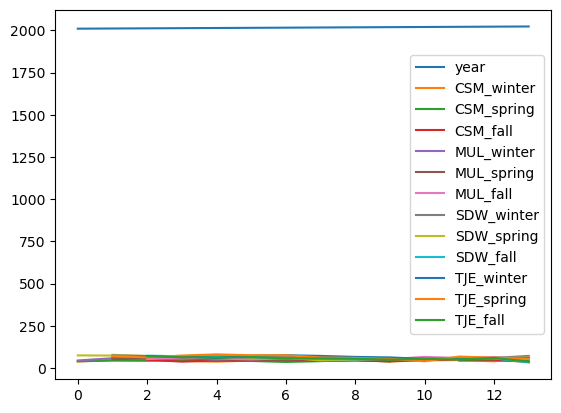

In [3]:
# Default plot(): one line plot per column with numeric data
df.plot()

As we can see, this doesn't make much sense! The default for `plot` is to use the values of the index as the x-axis values.

## Line Plots

We can make a line plot of one column against another by using the following general syntax:

```python
df.plot(x='x_values_column', y='y_values_column')
```

### Example

If we want to plot the bird surveys at CSM across years we can do:

<AxesSubplot:xlabel='year'>

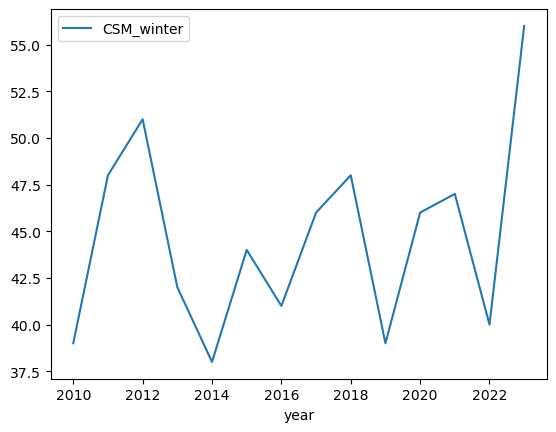

In [4]:
# Birds species registered during winter at CSM yearly
df.plot(x='year', y='CSM_winter')

We can do some basic customization specifying other parameters of the `plot()` method. Some basic ones are:

- `title`: title to use for the plot
- `xlabel`: changes the x-label on x-axis
- `ylabel`: changes the y-label on y-axis
- `color`: change the color of the plot
- `legend`: boolean value `True` or `False`

### Example

<AxesSubplot:title={'center':'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

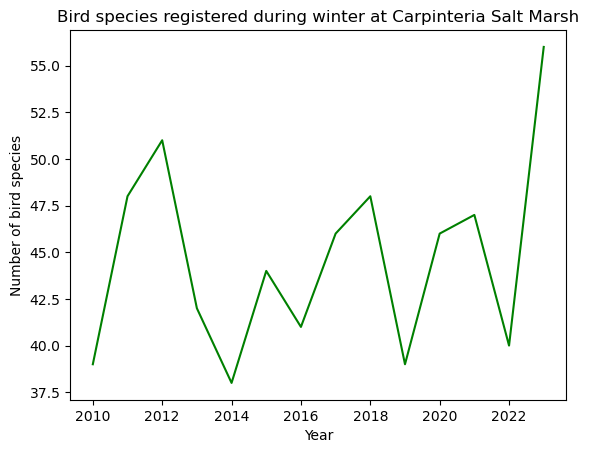

In [5]:
df.plot(x='year', 
        y='CSM_winter',
        title='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

### Check-in

1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

<AxesSubplot:title={'center':'Bird Species Recorded during Spring Surveys at Mugu Lagoon'}, xlabel='Year', ylabel='Number of bird species'>

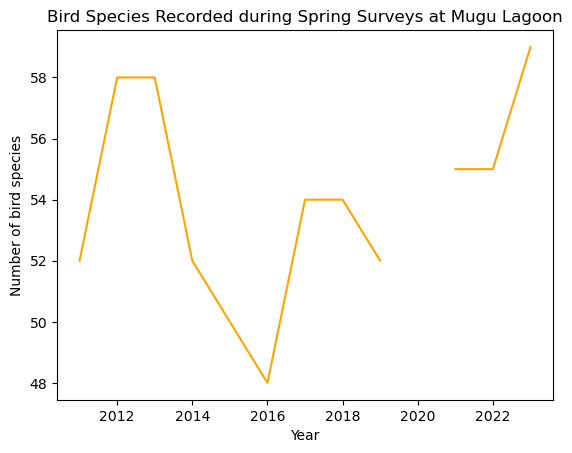

In [6]:
df.plot(x='year',
        y='MUL_spring',
        title='Bird Species Recorded during Spring Surveys at Mugu Lagoon',
        xlabel='Year',
        ylabel='Number of bird species',
        color='orange',
        legend=False)

2. Use the `isna()` method for `pandas.Series` and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey. 

In [7]:
MUL_NA = df[df['MUL_spring'].isna()]
print(MUL_NA)

    year  CSM_winter  CSM_spring  CSM_fall  MUL_winter  MUL_spring  MUL_fall  \
0   2010        39.0        40.0      50.0        45.0         NaN      61.0   
10  2020        46.0         NaN      47.0        56.0         NaN      66.0   

    SDW_winter  SDW_spring  SDW_fall  TJE_winter  TJE_spring  TJE_fall  
0          NaN        75.0      85.0         NaN         NaN      81.0  
10        57.0         NaN      58.0        54.0        40.0      54.0  


## Multiple Line Plots

We can plot multiple line plots by updating these parameters in the `plot()` method:

- `y`: a list of column names that will be plotted against the x-axis
- `color`: a dictionary `{'column_1' : 'color_1', 'column_2' : 'color_2'}` specifying the color of each column's line plot.

### Example

Let's say we want to compare the bird surveys at the Tijuana Estuary during spring and fall across years.

<AxesSubplot:title={'center':'Seasonal bird surveys at Tijuana Estuary'}, xlabel='Year', ylabel='Number of bird species'>

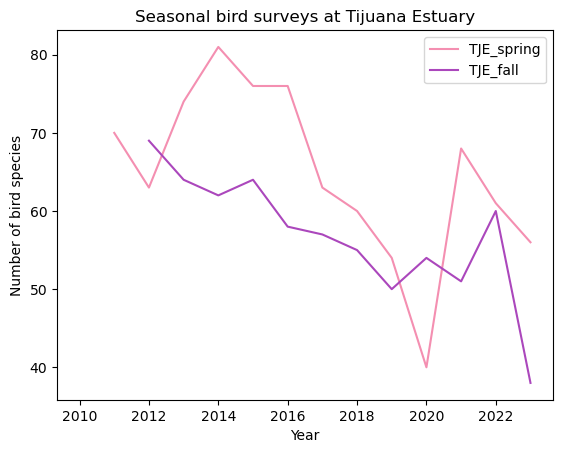

In [8]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 }
        )

We can also create separate plots for each column by setting the `subset` to `True`

array([<AxesSubplot:xlabel='Year', ylabel='Number of bird species'>,
       <AxesSubplot:xlabel='Year', ylabel='Number of bird species'>],
      dtype=object)

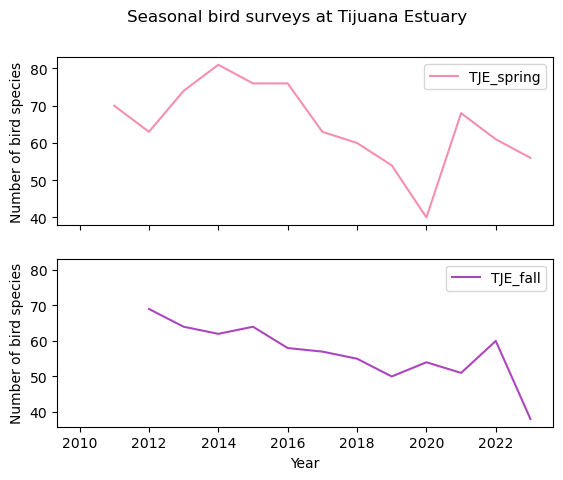

In [9]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True
        )

## Updating the index

**Updating the index** of our data frame to be something other than the default integers numbering the rows can be a useful operation for plotting. Tp update the index we use the `set_index()` method for a `pandas.DataFrame`.

The general syntax for setting a column as the new index is:

```python
df.set_index('column_name')
```

where `column_name` is the name of the column in the data frame `df` we want to use as the new index.

This operation does not happen in-place.

- A function **acting in-place** means that our original object (in this case a `pandas.DataFrame`) is modified
- A function **does not act in-place**, a new object (in this case a `pandas.DataFrame`) is created and the orignial is not modified.

If we want to update our `df` data frame we could do an **explicit assignment** to reassign the output of `set_index()` to `df`:

```python
df = df.set_index('column_name')
```

or use the optional `inplace` parameter:

```python
df.set_index('column_name', inplace=True)
```

The best practice, however, is to avoid using `inplace=True` for more clear and maintainable code.

### Example

In all our previous examples we used the year column as the x-axis. Since all our bird survey variables are dependent on the year, it makes sense to use the year column as the index of the data frame:

In [10]:
# Update index to be the year column
df = df.set_index('year')
df.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
year,,,,,,,,,,,,
2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<AxesSubplot:xlabel='year'>

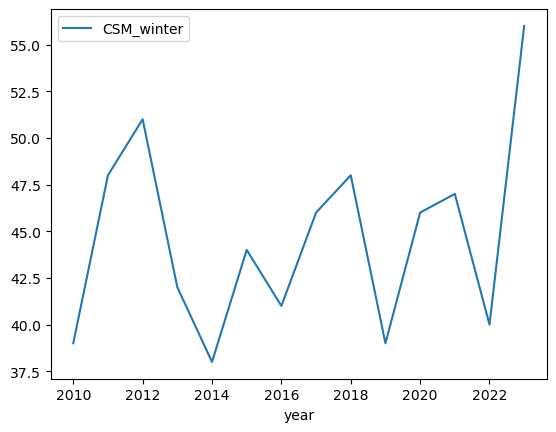

In [11]:
# Simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

If needed, we can reset the index to be the numbering of the rows:

In [12]:
df = df.reset_index()
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


### Check-in

1. Without running the code, give a step-by-step breakdown of what this code is doing:

```python
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```

This code is:

1. Updating the index to be the year column
2. Selecting a slice of the `df` dataframe from `SDW_winter` to `TJE_fall`
3. Plotting the selected slice of the dataframe, with the index (year) on the x-axis, and sliced columns on the y-axis

2. Is this code modifying the data frame `df`? Why or why not?

It is not modifying the data frame because these functions do not act in-place. Therefore, a new object is created and the original data frame is not modified.

3. Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

It appears that we may not have all the necessary data to compare these two sites. The spring surveys start in different years and there is some missing spring data for SDW. This question goes beyond plotting, since we don't know enough information about the locations of these lagoons based on the plot.

<AxesSubplot:xlabel='year'>

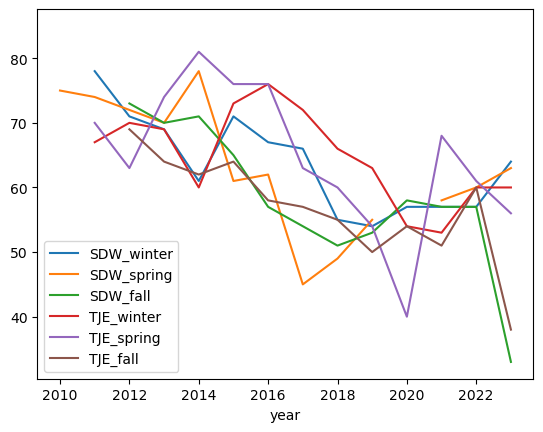

In [13]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

## Lesson Summary

In this lesson we learned to:
1. Make line plots with both one and multiple lines 
2. How to update the index of our dataframe to be something more descriptive and useful

## Method Chaining

The code used in the check-in:

```python
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```

is an example of **method chaining**.

Each method in the cahin returns an object, allowing the next method to be called directly on the result. Great technique to make your code concise and readable.

You can also break lines in method chaining

<AxesSubplot:xlabel='year'>

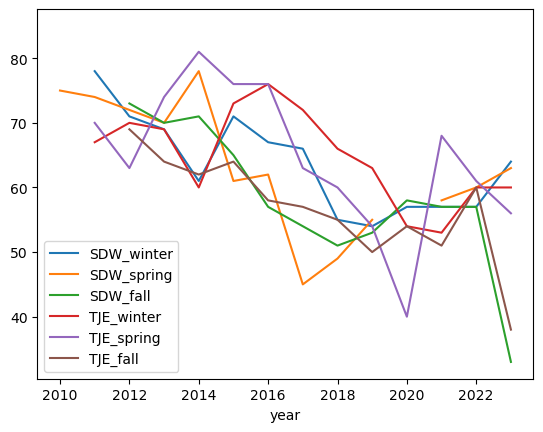

In [14]:
(df.set_index('year')
    .loc[:,'SDW_winter':'TJE_fall']
    .plot()
)

## About the data

We will use the Palmer penguins dataset.

Data about size measurements for 3 penguin species in the Palmer Archipelago, during 2008, 2007, and 2009.

In [17]:
# Load the data
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [18]:
# Check column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [19]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [20]:
# Get unique value in species column
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [21]:
# Count per unique value in species column
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind` argument in `plot()`

`plot()` method creates a line plot by default.

If we change the value of the `kind` parameter we can create different kinds of plots.

### Example: scatter plot

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

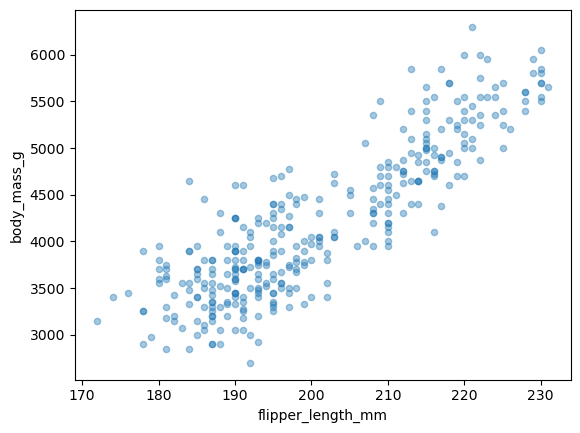

In [22]:
# Compare the flipper length against the body mass using a scatterplot
penguins.plot(kind='scatter',
              x='flipper_length_mm',
              y='body_mass_g',
              alpha=0.4
             )